[*********************100%%**********************]  1 of 1 completed


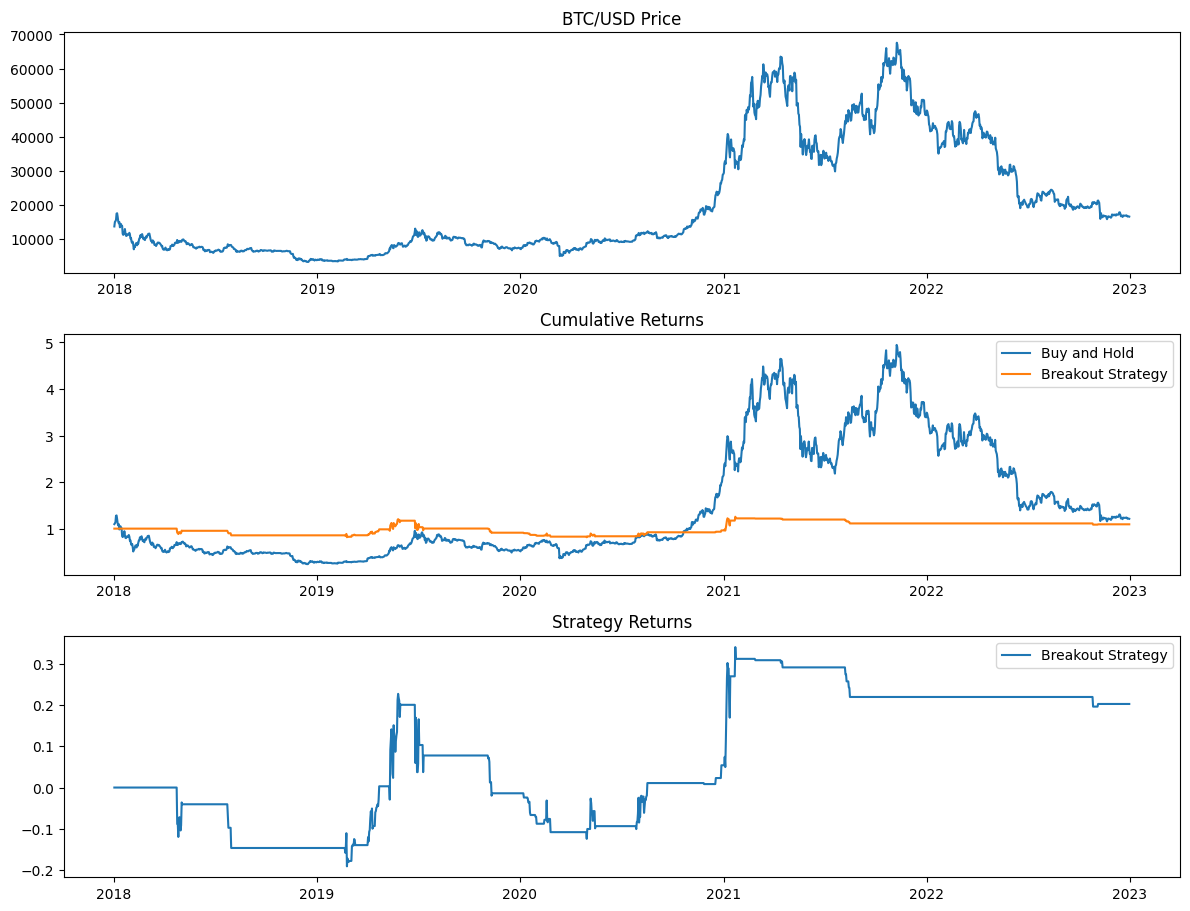

Sharpe Ratio: 0.1573


In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate last month's highest close price and volume
data['LastMonthHighClose'] = data['Close'].shift(21).rolling(window=21).max()
data['LastMonthHighVolume'] = data['Volume'].shift(21).rolling(window=21).max()

data['LongSignal'] = 0
condition = (data['Close'] > data['LastMonthHighClose']) & (data['Volume'] > data['LastMonthHighVolume'])
data.loc[condition, 'LongSignal'] = 1

data['Position'] = data['LongSignal'].shift(1)  # Enter the position on the next day
data['Position'].fillna(0, inplace=True)  # Fill NaN with 0 for the first day
data['DailyReturns'] = data['Close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()
sharpe_ratio = np.sqrt(252)*average_strategy_return / std_dev_strategy_return

plt.figure(figsize=(12, 12))
plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='BTC/USD')
plt.title('BTC/USD Price')

plt.subplot(4, 1, 2)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='Breakout Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.subplot(4, 1, 3)
plt.plot(data['StrategyReturns'].cumsum(), label='Breakout Strategy')
plt.legend()
plt.title('Strategy Returns')

plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')


[*********************100%%**********************]  1 of 1 completed


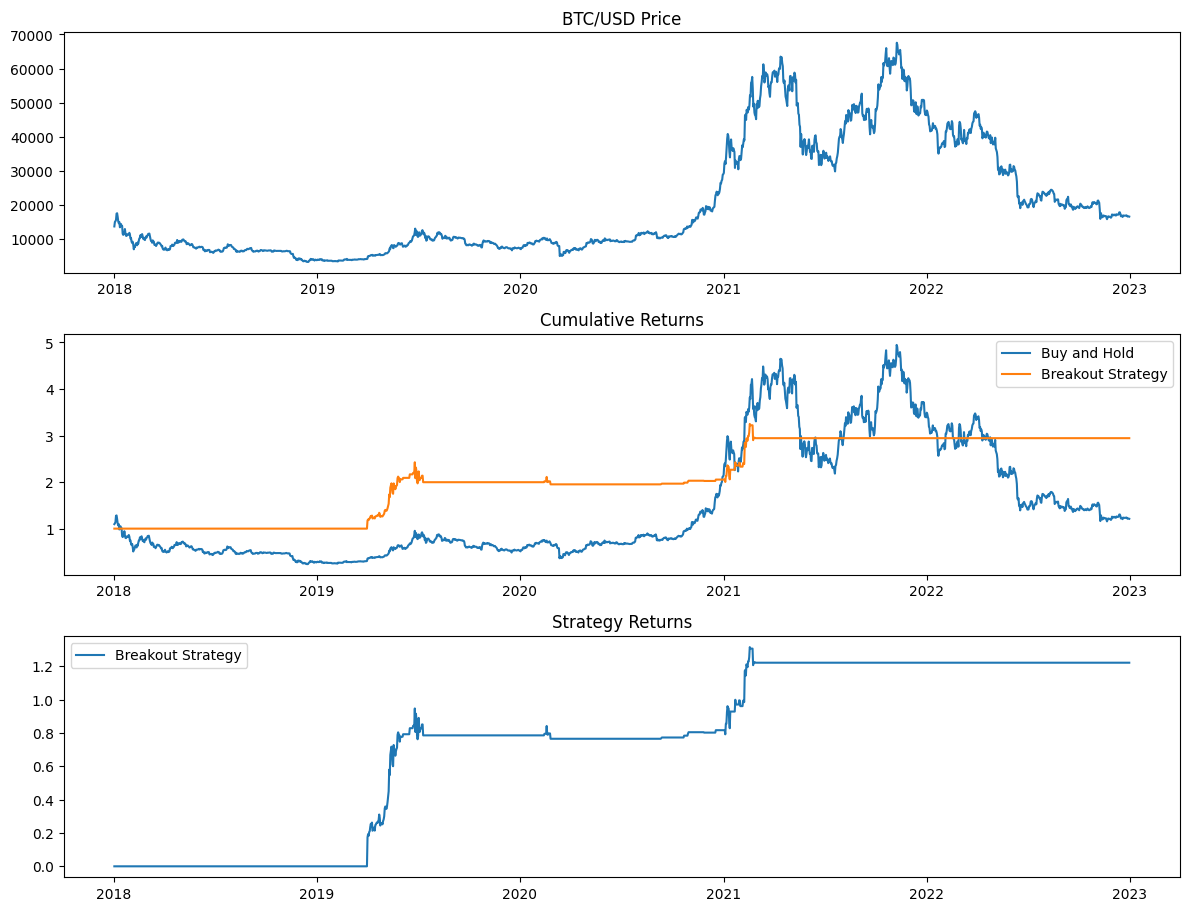

Sharpe Ratio: 0.8396


In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate last quarter's highest close price and volume
data['LastQuarterHighClose'] = data['Close'].shift(59).rolling(window=59).max()
data['LastQuarterHighVolume'] = data['Volume'].shift(59).rolling(window=59).max()

data['LongSignal'] = 0
condition = (data['Close'] > data['LastQuarterHighClose']) & (data['Volume'] > data['LastQuarterHighVolume'])
data.loc[condition, 'LongSignal'] = 1

data['Position'] = data['LongSignal'].shift(1)  # Enter the position on the next day
data['Position'].fillna(0, inplace=True)  # Fill NaN with 0 for the first day
data['DailyReturns'] = data['Close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()
sharpe_ratio = np.sqrt(252)*average_strategy_return / std_dev_strategy_return

plt.figure(figsize=(12, 12))
plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='BTC/USD')
plt.title('BTC/USD Price')

plt.subplot(4, 1, 2)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='Breakout Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.subplot(4, 1, 3)
plt.plot(data['StrategyReturns'].cumsum(), label='Breakout Strategy')
plt.legend()
plt.title('Strategy Returns')

plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')



[*********************100%%**********************]  1 of 1 completed


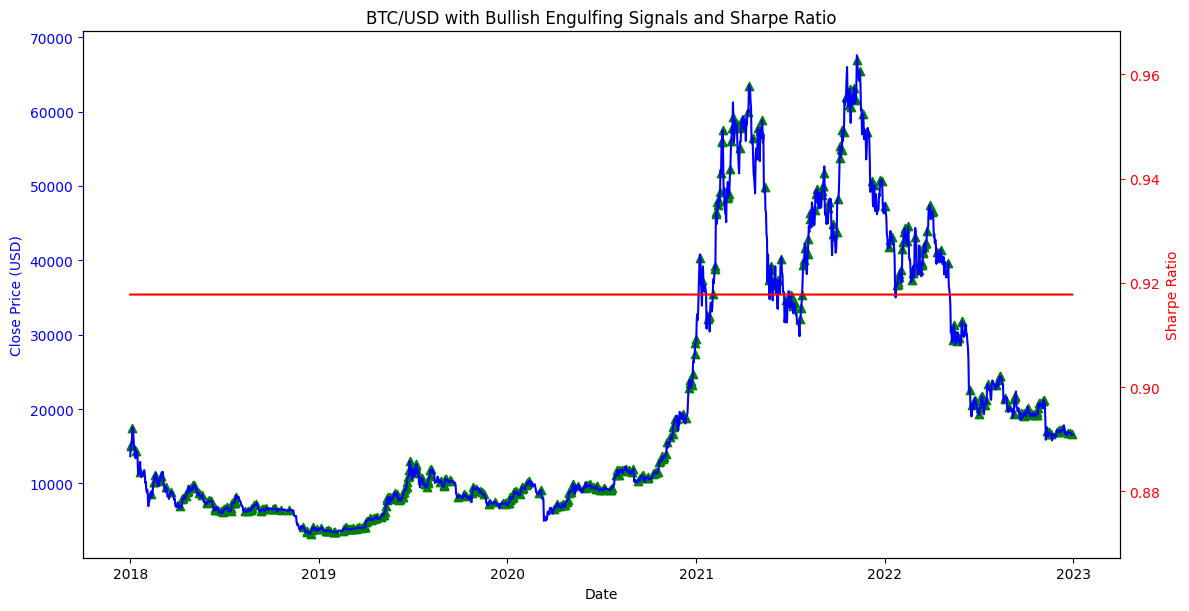

Sharpe Ratio: 0.9178


In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data[['Open', 'Close']]

def bullish_engulfing_strategy(prices):
    signals = pd.DataFrame(index=prices.index)
    signals['Signal'] = 0  # 0 represents no signal

    for i in range(1, len(prices)):
        # Check for a bullish engulfing pattern
        if prices['Open'][i] < prices['Close'][i-1] and prices['Close'][i] > prices['Open'][i-1]:
            signals['Signal'][i] = 1  # 1 represents a bullish engulfing signal

    return signals

def calculate_returns(prices, signals):
    daily_returns = prices['Close'].pct_change().shift(-1)
    strategy_returns = daily_returns * signals['Signal']
    strategy_returns = strategy_returns.dropna()

    return strategy_returns

start_date = '2018-01-01'
end_date = '2023-01-01'

btc_prices = get_historical_data('BTC-USD', start_date, end_date)
engulfing_signals = bullish_engulfing_strategy(btc_prices)
strategy_returns = calculate_returns(btc_prices, engulfing_signals)

sharpe_ratio = np.sqrt(252) * strategy_returns.mean() / strategy_returns.std()
sharpe_df = pd.DataFrame({'Sharpe Ratio': sharpe_ratio}, index=strategy_returns.index)
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(btc_prices.index, btc_prices['Close'], label='BTC/USD Close Prices', color='blue')
ax1.scatter(engulfing_signals[engulfing_signals['Signal'] == 1].index,
            btc_prices['Close'][engulfing_signals['Signal'] == 1],
            marker='^', color='green', label='Bullish Engulfing Signal')

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(sharpe_df.index, sharpe_df['Sharpe Ratio'], label='Sharpe Ratio', color='red')
ax2.set_ylabel('Sharpe Ratio', color='red')
ax2.tick_params('y', colors='red')

fig.tight_layout()
plt.title('BTC/USD with Bullish Engulfing Signals and Sharpe Ratio')
plt.show()
print(f'Sharpe Ratio: {sharpe_ratio:.4f}')


[*********************100%%**********************]  1 of 1 completed


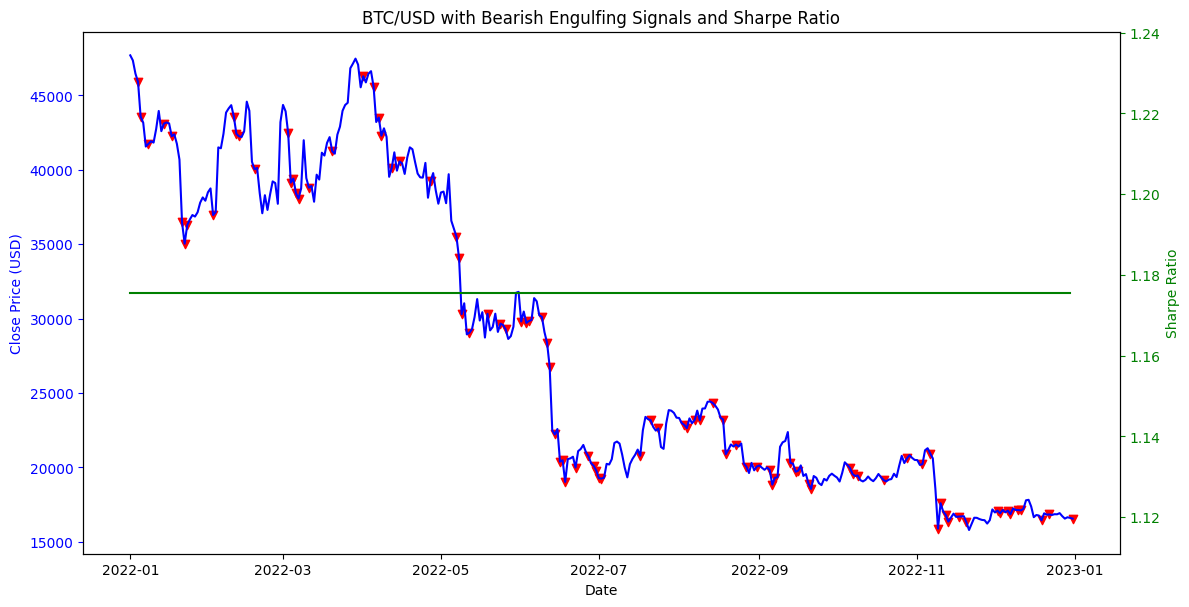

Sharpe Ratio: 1.1756


In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data[['Open', 'Close']]

def bearish_engulfing_strategy(prices):
    signals = pd.DataFrame(index=prices.index)
    signals['Signal'] = 0  # 0 represents no signal

    for i in range(1, len(prices)):
        # Check for a bearish engulfing pattern
        if prices['Open'][i] > prices['Close'][i-1] and prices['Close'][i] < prices['Open'][i-1]:
            signals['Signal'][i] = -1  # -1 represents a bearish engulfing signal

    return signals

def calculate_returns(prices, signals):
    # Calculate daily returns based on the trading signals
    daily_returns = prices['Close'].pct_change().shift(-1)

    # Generate returns based on trading signals
    strategy_returns = daily_returns * signals['Signal']

    # Drop rows with NaN in returns
    strategy_returns = strategy_returns.dropna()

    return strategy_returns

# Set the date range
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical data for BTC/USD
btc_prices = get_historical_data('BTC-USD', start_date, end_date)

# Apply the bearish engulfing strategy
engulfing_signals = bearish_engulfing_strategy(btc_prices)

# Calculate returns based on the strategy
strategy_returns = calculate_returns(btc_prices, engulfing_signals)

# Calculate Sharpe ratio
sharpe_ratio = np.sqrt(252) * strategy_returns.mean() / strategy_returns.std()

# Create a DataFrame for Sharpe ratio with the same index as the returns
sharpe_df = pd.DataFrame({'Sharpe Ratio': sharpe_ratio}, index=strategy_returns.index)

# Plot the closing prices, highlight bearish engulfing signals, and display Sharpe ratio
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing prices
ax1.plot(btc_prices.index, btc_prices['Close'], label='BTC/USD Close Prices', color='blue')
ax1.scatter(engulfing_signals[engulfing_signals['Signal'] == -1].index,
            btc_prices['Close'][engulfing_signals['Signal'] == -1],
            marker='v', color='red', label='Bearish Engulfing Signal')

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for Sharpe ratio
ax2 = ax1.twinx()
ax2.plot(sharpe_df.index, sharpe_df['Sharpe Ratio'], label='Sharpe Ratio', color='green')
ax2.set_ylabel('Sharpe Ratio', color='green')
ax2.tick_params('y', colors='green')

fig.tight_layout()
plt.title('BTC/USD with Bearish Engulfing Signals and Sharpe Ratio')
plt.show()
print(f'Sharpe Ratio: {sharpe_ratio:.4f}')

[*********************100%%**********************]  1 of 1 completed


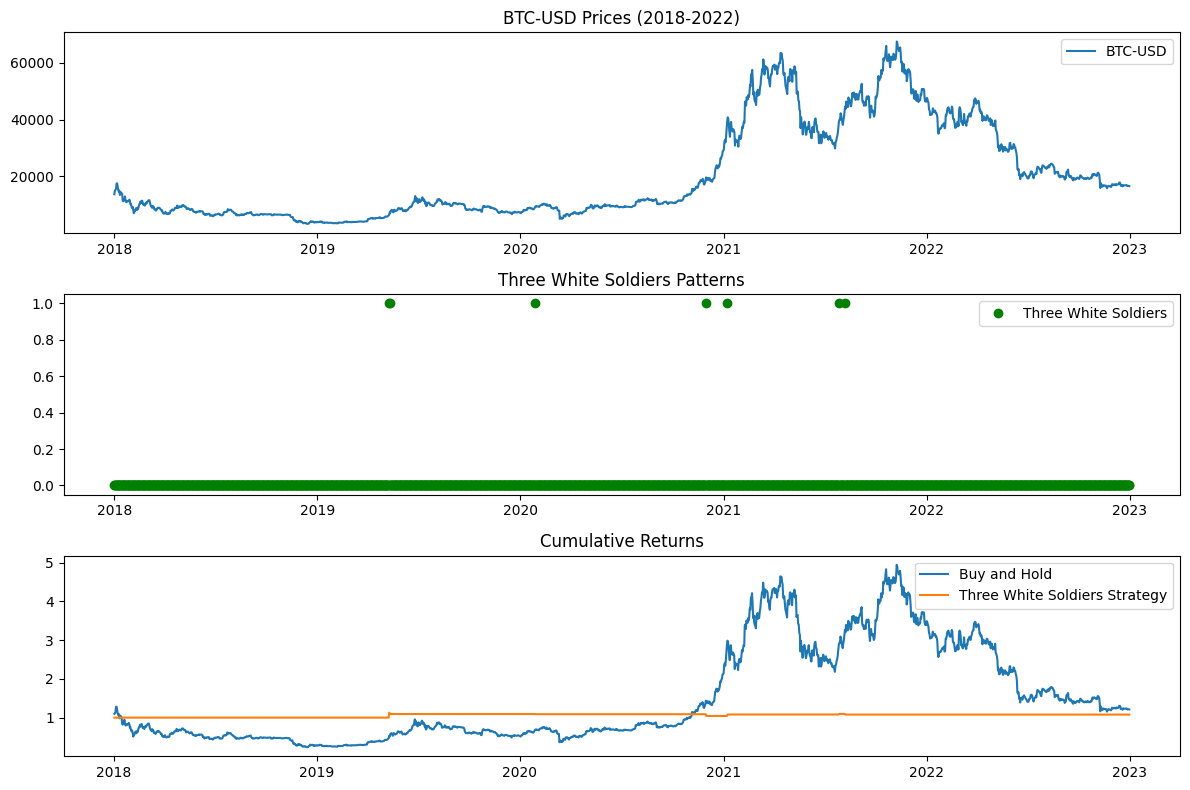

Sharpe Ratio: 0.2158


In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for BTC
symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the percentage change and body percentage for each candle
data['Prchng'] = data['Close'].pct_change() * 100
data['BODY%'] = ((data['Close'] - data['Open']).abs() / (data['High'] - data['Low'])).mul(100)

# Identify Three White Soldiers patterns based on conditions
data['ThreeWhiteSoldiers'] = (
    (data['BODY%'] > 65) &
    (data['Prchng'] >= 2.5) &
    (data['Prchng'].shift() >= 2.5) &
    (data['Prchng'].shift(2) >= 2.5) &
    ((data['Open'].shift(2) - data['Close'].shift(2)) < 0) &
    ((data['Open'].shift() - data['Close'].shift()) < 0) &
    ((data['Open'] - data['Close']) < 0)
).astype(int)

# Trading strategy based on Three White Soldiers patterns
data['Position'] = data['ThreeWhiteSoldiers'].shift(1)
data['Position'].fillna(0, inplace=True)
data['DailyReturns'] = data['Close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

# Calculate Sharpe ratio
average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()
sharpe_ratio = np.sqrt(252)*average_strategy_return / std_dev_strategy_return

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label=symbol)
plt.title(f'{symbol} Prices (2018-2022)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['ThreeWhiteSoldiers'], marker='o', linestyle='', color='g', label='Three White Soldiers')
plt.title('Three White Soldiers Patterns')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='Three White Soldiers Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')


[*********************100%%**********************]  1 of 1 completed


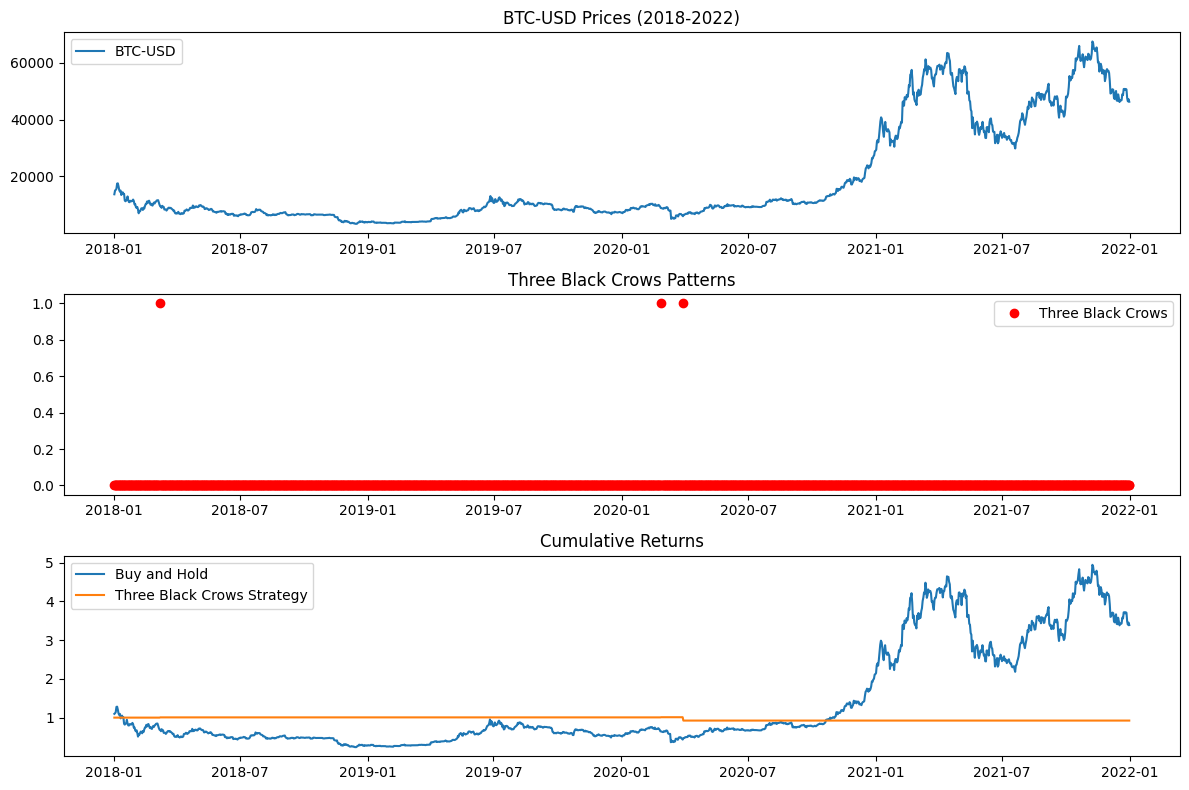

Sharpe Ratio: -0.3647


In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for BTC
symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2022-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the percentage change and body percentage for each candle
data['Prchng'] = data['Close'].pct_change() * 100
data['BODY%'] = ((data['Close'] - data['Open']).abs() / (data['High'] - data['Low'])).mul(100)

# Identify Three Black Crows patterns based on converse conditions
data['ThreeBlackCrows'] = (
    (data['BODY%'] > 65) &
    (data['Prchng'] <= -2.5) &
    (data['Prchng'].shift() <= -2.5) &
    (data['Prchng'].shift(2) <= -2.5) &
    ((data['Open'].shift(2) - data['Close'].shift(2)) > 0) &
    ((data['Open'].shift() - data['Close'].shift()) > 0) &
    ((data['Open'] - data['Close']) > 0)
).astype(int)

# Trading strategy based on Three Black Crows patterns
data['Position'] = -data['ThreeBlackCrows'].shift(1)  # Short position for Three Black Crows
data['Position'].fillna(0, inplace=True)
data['DailyReturns'] = data['Close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

# Calculate Sharpe ratio
average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()
sharpe_ratio = np.sqrt(252)*average_strategy_return / std_dev_strategy_return

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label=symbol)
plt.title(f'{symbol} Prices (2018-2022)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['ThreeBlackCrows'], marker='o', linestyle='', color='r', label='Three Black Crows')
plt.title('Three Black Crows Patterns')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='Three Black Crows Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')


[*********************100%%**********************]  1 of 1 completed


<ipython-input-13-af1a32b7311a>:28: RuntimeWarning: invalid value encountered in double_scalars
  sharpe_ratio = average_strategy_return / std_dev_strategy_return


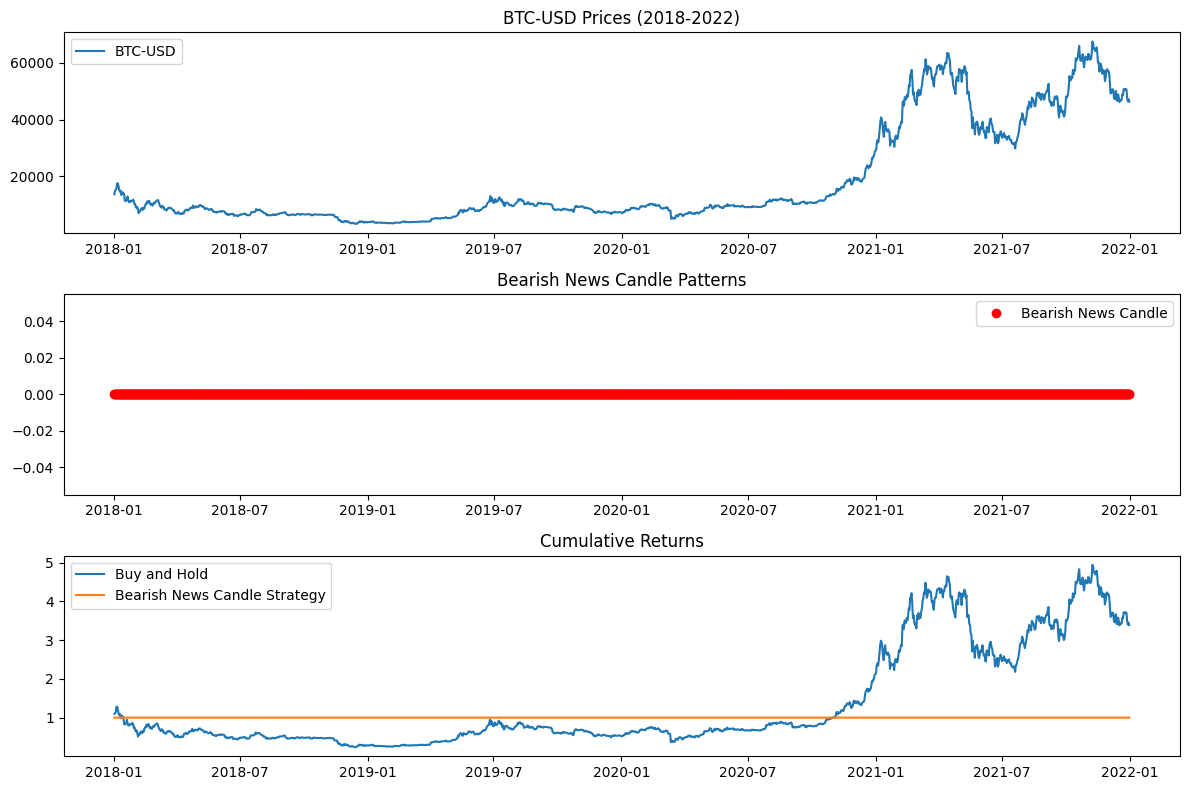

Sharpe Ratio: nan


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for BTC
symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2022-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Identify Bearish News Candle patterns based on conditions
data['BearishNewsCandle'] = (
    (data['Low'] > data['High'].shift()) &
    ((data['Open'] - data['Close']) > 0)
).astype(int)

# Trading strategy based on Bearish News Candle patterns
data['Position'] = -data['BearishNewsCandle'].shift(1)  # Short position for Bearish News Candle
data['Position'].fillna(0, inplace=True)
data['DailyReturns'] = data['Close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

# Calculate Sharpe ratio
average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()
sharpe_ratio = average_strategy_return / std_dev_strategy_return

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label=symbol)
plt.title(f'{symbol} Prices (2018-2022)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['BearishNewsCandle'], marker='o', linestyle='', color='r', label='Bearish News Candle')
plt.title('Bearish News Candle Patterns')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='Bearish News Candle Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')


[*********************100%%**********************]  1 of 1 completed


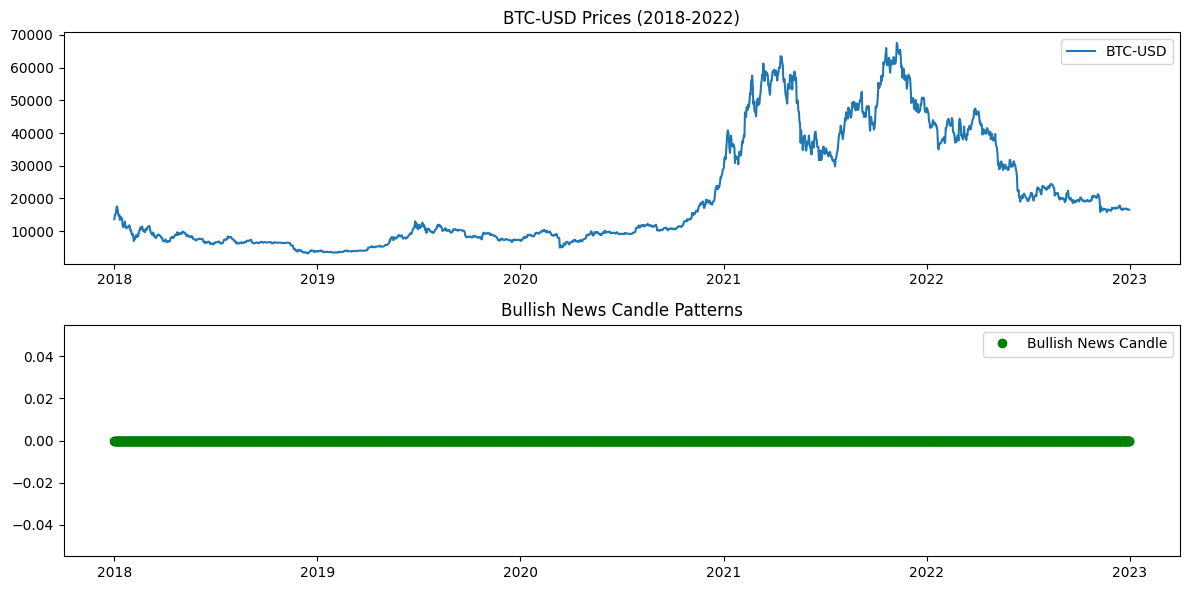

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for BTC
symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Identify Bullish News Candle patterns based on conditions
data['BullishNewsCandle'] = (
    (data['High'] < data['Low'].shift()) &
    ((data['Open'] - data['Close']) < 0)
).astype(int)

# Plot BTC prices
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label=symbol)
plt.title(f'{symbol} Prices (2018-2022)')
plt.legend()

# Plot Bullish News Candle patterns
plt.subplot(2, 1, 2)
plt.plot(data['BullishNewsCandle'], marker='o', linestyle='', color='g', label='Bullish News Candle')
plt.title('Bullish News Candle Patterns')
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


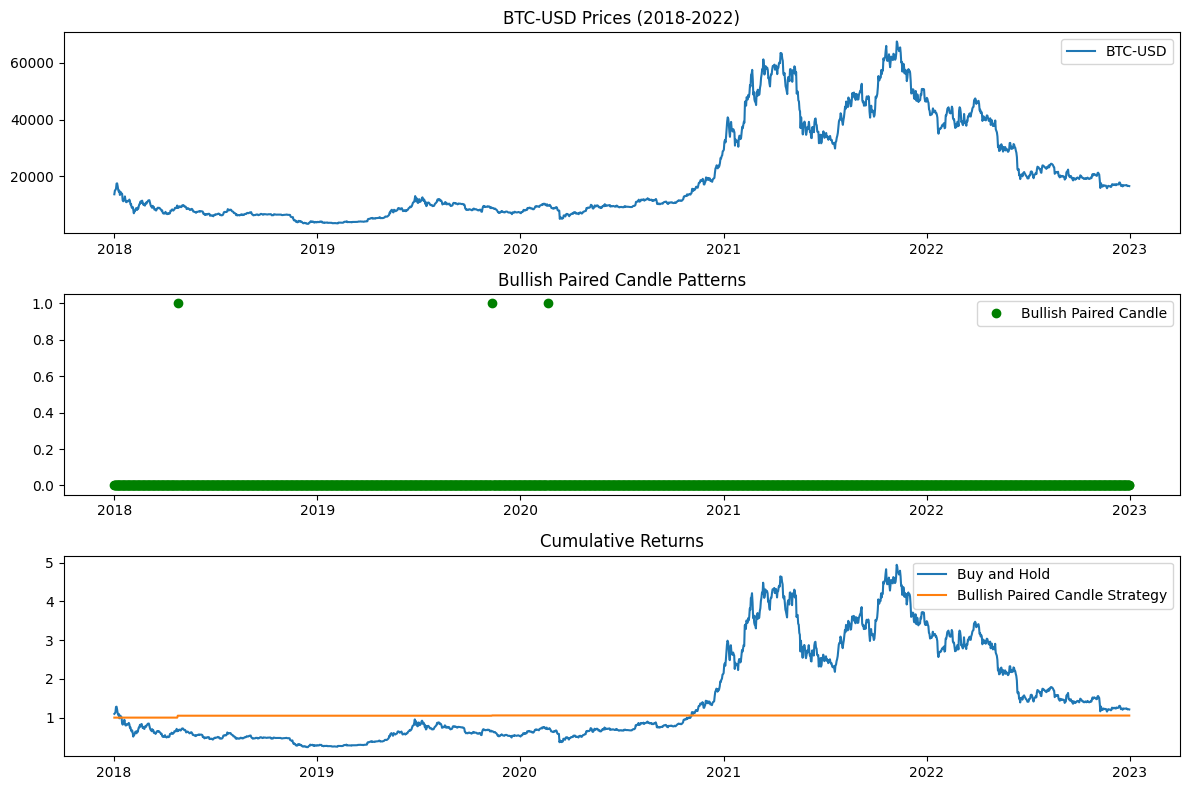

Sharpe Ratio: 0.3978


In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for BTC
symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the body and body percentage for each candle
data['BODY'] = data['Close'] - data['Open']
data['BODY%'] = ((data['Close'] - data['Open']).abs() / (data['High'] - data['Low'])).mul(100)

# Identify Bullish Paired Candle patterns based on conditions
data['BullishPairedCandle'] = (
    (data['Close'] < data['Open'].shift()) &
    (abs(data['BODY']) >= abs(data['BODY'].shift())) &
    ((0.8 * abs(data['BODY'])) <= abs(data['BODY'].shift())) &
    (abs(data['BODY%'].shift()) >= 70) &
    (abs(data['BODY%']) >= 70) &
    (data['Open'] >= data['Close'].shift()) &
    ((data['Open'].shift() - data['Close'].shift()) < 0) &
    ((data['Open'] - data['Close']) > 0)
).astype(int)

# Trading strategy based on Bullish Paired Candle patterns
data['Position'] = data['BullishPairedCandle'].shift(1)
data['Position'].fillna(0, inplace=True)
data['DailyReturns'] = data['Close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

# Calculate Sharpe ratio
average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()
sharpe_ratio = np.sqrt(252)*average_strategy_return / std_dev_strategy_return

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label=symbol)
plt.title(f'{symbol} Prices (2018-2022)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['BullishPairedCandle'], marker='o', linestyle='', color='g', label='Bullish Paired Candle')
plt.title('Bullish Paired Candle Patterns')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='Bullish Paired Candle Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')


[*********************100%%**********************]  1 of 1 completed


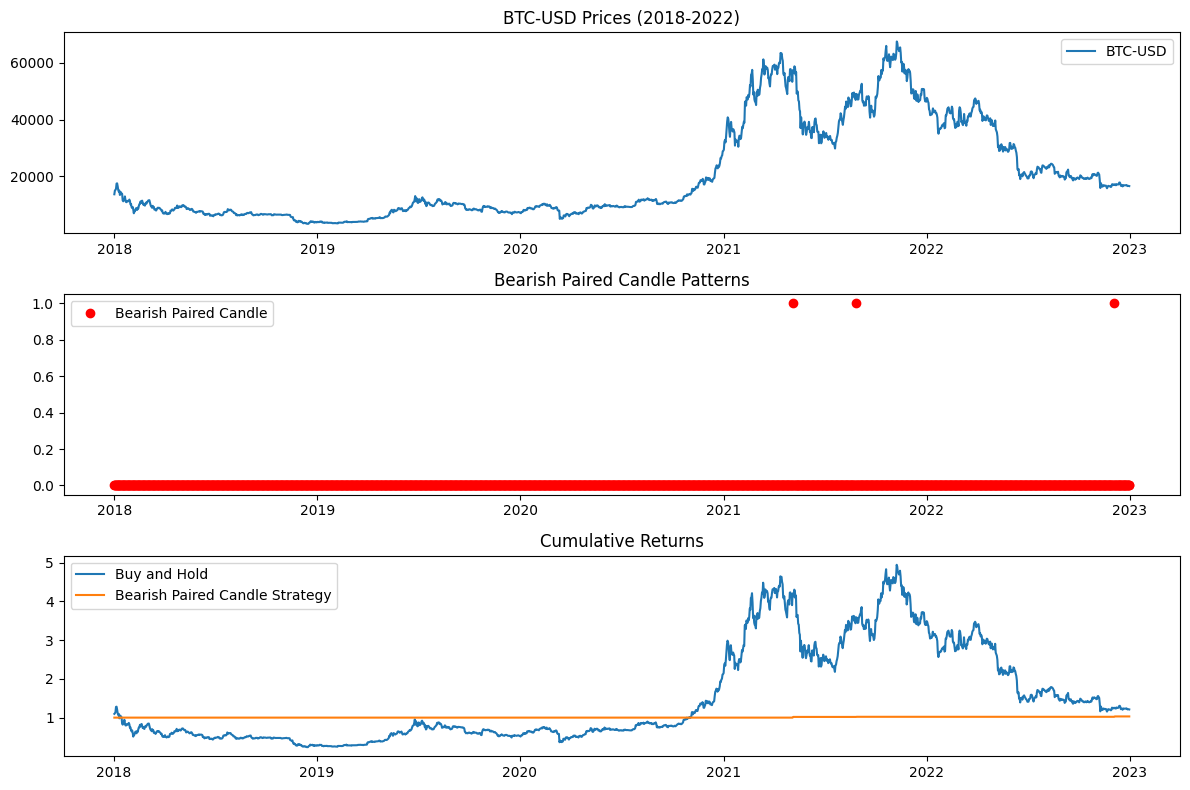

Sharpe Ratio: 0.5518


In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for BTC
symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the body and body percentage for each candle
data['BODY'] = data['Close'] - data['Open']
data['BODY%'] = ((data['Close'] - data['Open']).abs() / (data['High'] - data['Low'])).mul(100)

# Identify Bearish Paired Candle patterns based on converse conditions
data['BearishPairedCandle'] = (
    (data['Close'] > data['Open'].shift()) &
    (abs(data['BODY']) >= abs(data['BODY'].shift())) &
    ((0.8 * abs(data['BODY'])) <= abs(data['BODY'].shift())) &
    (abs(data['BODY%'].shift()) >= 70) &
    (abs(data['BODY%']) >= 70) &
    (data['Open'] <= data['Close'].shift()) &
    ((data['Open'].shift() - data['Close'].shift()) > 0) &
    ((data['Open'] - data['Close']) < 0)
).astype(int)

# Trading strategy based on Bearish Paired Candle patterns
data['Position'] = -data['BearishPairedCandle'].shift(1)
data['Position'].fillna(0, inplace=True)
data['DailyReturns'] = data['Close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

# Calculate Sharpe ratio
average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()
sharpe_ratio = np.sqrt(252)*average_strategy_return / std_dev_strategy_return

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label=symbol)
plt.title(f'{symbol} Prices (2018-2022)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['BearishPairedCandle'], marker='o', linestyle='', color='r', label='Bearish Paired Candle')
plt.title('Bearish Paired Candle Patterns')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='Bearish Paired Candle Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')


[*********************100%%**********************]  1 of 1 completed


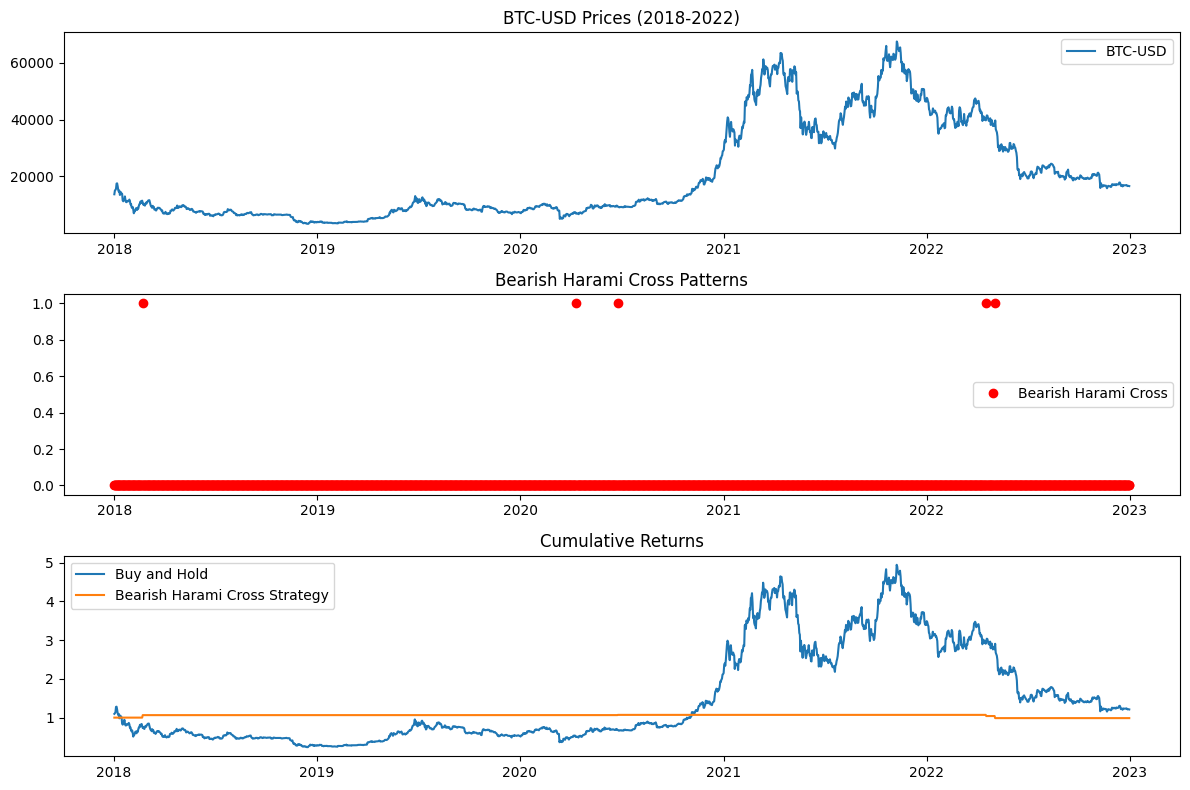

Sharpe Ratio: -0.0394


In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for BTC
symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the body percentage for each candle
data['BODY%'] = ((data['Close'] - data['Open']).abs() / (data['High'] - data['Low'])).mul(100)

# Identify Bearish Harami Cross patterns based on conditions
data['BearishHaramiCross'] = (
    (data['BODY%'] > 65) &
    (data['BODY%'].shift() < 25) &
    (data['BODY%'].shift(2) > 65) &
    ((data['Open'].shift(2) - data['Close'].shift(2)) < 0) &
    ((data['Open'] - data['Close']) > 0) &  # Latest candle is red
    ((data['Low'] < data['Low'].shift(2)))
).astype(int)

# Trading strategy based on Bearish Harami Cross patterns
data['Position'] = -data['BearishHaramiCross'].shift(1)
data['Position'].fillna(0, inplace=True)
data['DailyReturns'] = data['Close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

# Calculate Sharpe ratio
average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()
sharpe_ratio = np.sqrt(252)*average_strategy_return / std_dev_strategy_return

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label=symbol)
plt.title(f'{symbol} Prices (2018-2022)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['BearishHaramiCross'], marker='o', linestyle='', color='r', label='Bearish Harami Cross')
plt.title('Bearish Harami Cross Patterns')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='Bearish Harami Cross Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')


[*********************100%%**********************]  1 of 1 completed


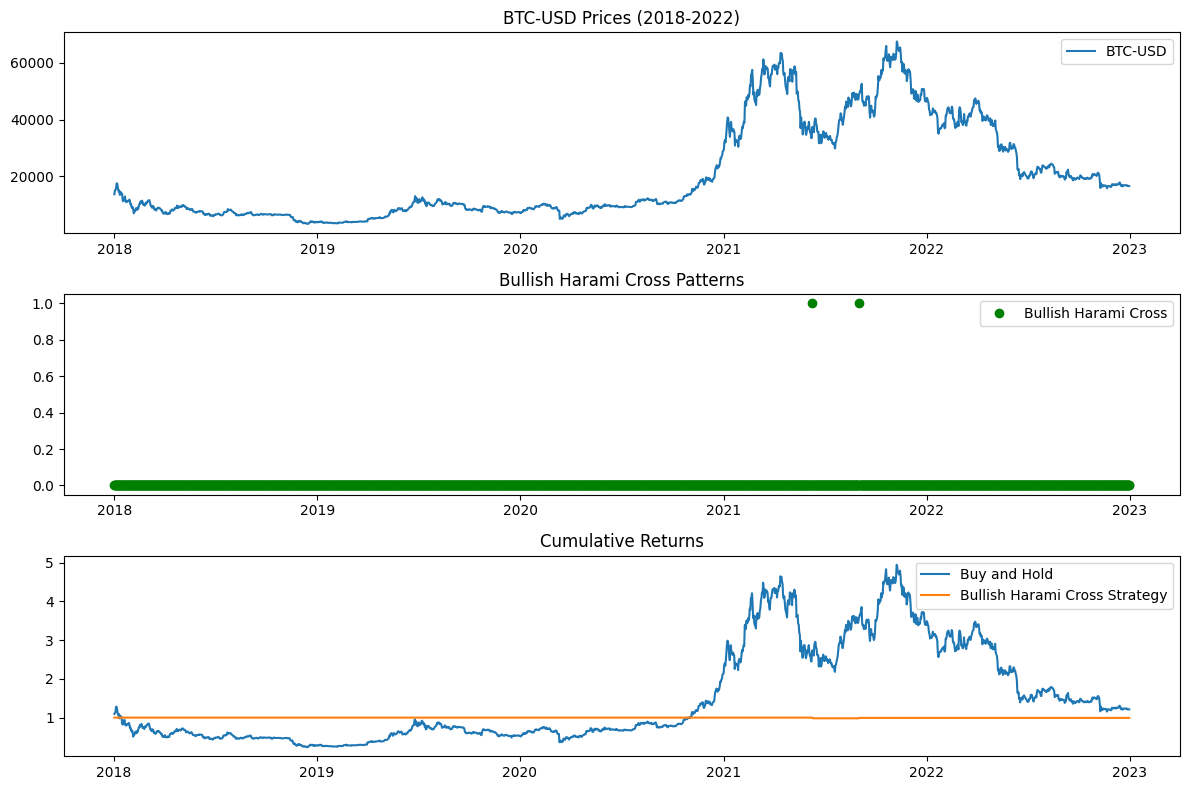

Sharpe Ratio: -0.1380


In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for BTC
symbol = "BTC-USD"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the body percentage for each candle
data['BODY%'] = ((data['Close'] - data['Open']).abs() / (data['High'] - data['Low'])).mul(100)

# Identify Bullish Harami Cross patterns based on conditions
data['BullishHaramiCross'] = (
    (data['BODY%'] > 65) &
    (data['BODY%'].shift() < 15) &
    (data['BODY%'].shift(2) > 65) &
    ((data['Open'] - data['Close']) < 0) &  # Latest candle is green
    ((data['Open'].shift(2) - data['Close'].shift(2)) > 0) &  # 1st candle is red
    (data['High'].shift(2) < data['High'])
).astype(int)

# Trading strategy based on Bullish Harami Cross patterns
data['Position'] = data['BullishHaramiCross'].shift(1)
data['Position'].fillna(0, inplace=True)
data['DailyReturns'] = data['Close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

# Calculate Sharpe ratio
average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()
sharpe_ratio = np.sqrt(252)*average_strategy_return / std_dev_strategy_return

# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label=symbol)
plt.title(f'{symbol} Prices (2018-2022)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['BullishHaramiCross'], marker='o', linestyle='', color='g', label='Bullish Harami Cross')
plt.title('Bullish Harami Cross Patterns')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='Bullish Harami Cross Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')
